In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.python.keras.preprocessing import image
from tensorflow.keras.applications import vgg16, VGG16

In [2]:
def load_image(image_url, target_size):
    img = image.load_img(image_url, target_size=target_size)
    return img

def preprocess_function(img, model_preproc):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return model_preproc(x)

In [3]:
VGG16_model = VGG16(include_top=True, weights='imagenet', classes=1000)

In [4]:
target_size = VGG16_model._feed_input_shapes[0][1:3]
print("target_size:", target_size)
VGG16_model

target_size: (224, 224)


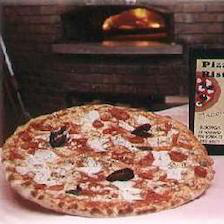

In [5]:
# Get image
IMAGE_URL = "../data/pizza3.jpg"

input_image = load_image(IMAGE_URL, target_size)
input_image

In [6]:
## Predict classes
x = preprocess_function(input_image, vgg16.preprocess_input)  # Preprocess image
predictions = VGG16_model.predict(x)  # Predict

# Show top-10 predictions
top_preds = 10
decoded_predictions = vgg16.decode_predictions(predictions, top=top_preds)[0]
preds_indexes = np.argsort(predictions[0])[::-1][:top_preds]  # Get indexes of top-10 predictions
pd.DataFrame(decoded_predictions, columns=["WNID", "Class name", "Prob."], index=preds_indexes).style.background_gradient()

,WNID,Class name,Prob.
963,n07873807,pizza,0.752494
931,n07693725,bagel,0.047179
930,n07684084,French_loaf,0.043347
813,n04270147,spatula,0.018424
859,n04442312,toaster,0.015976
415,n02776631,bakery,0.015635
932,n07695742,pretzel,0.011887
891,n04542943,waffle_iron,0.008957
964,n07875152,potpie,0.007300
651,n03761084,microwave,0.004520


In [7]:
# Import EBAnO's Local Explanation Model

In [7]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(os.path.join(module_path, 'src/ebano'))

In [8]:
import ebano_express
import importlib

In [17]:
VGG16_model._feed_input_shapes[0][1:3]

(224, 224)

In [22]:
import tensorflow as tf

In [28]:
importlib.reload(ebano_express)

ebano_local_exp_bottlecap = ebano_express.LocalExplanationModel(
                                  input_image, 963,
                                  VGG16_model,
                                  preprocess_func=lambda x: preprocess_function(x, vgg16.preprocess_input),
                                  max_features=5,
                                  layers_to_analyze=5)

ebano_local_exp_bottlecap.fit_explanation(verbose=True)

/home/manuele/.local/share/virtualenvs/dal-ebano-qD1YCfZL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


> Computing explanation with '2' features...


/home/manuele/.local/share/virtualenvs/dal-ebano-qD1YCfZL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


> Computing explanation with '3' features...


/home/manuele/.local/share/virtualenvs/dal-ebano-qD1YCfZL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


> Computing explanation with '4' features...


/home/manuele/.local/share/virtualenvs/dal-ebano-qD1YCfZL/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


> Computing explanation with '5' features...


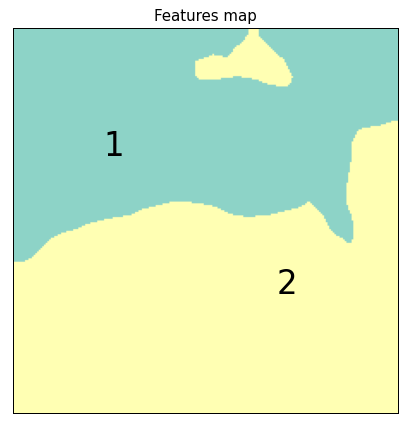

In [29]:
ebano_local_exp_bottlecap.best_explanation.show_features_map()
plt.show()
plt.close()

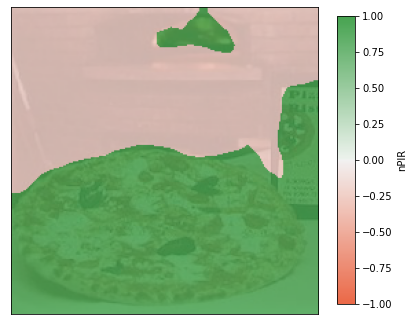

In [30]:
ebano_local_exp_bottlecap.best_explanation.show_visual_explanation()
plt.show()
plt.close()

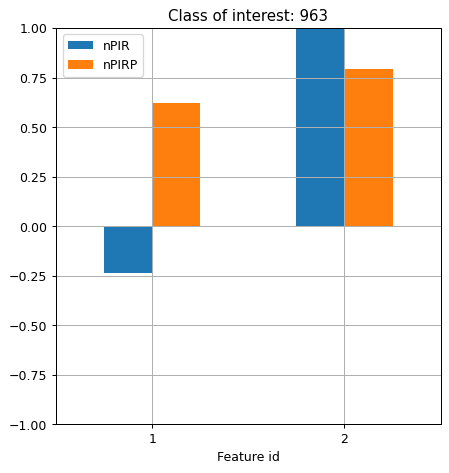

In [31]:
# The Numerical Explanation shows:

#     The nPIR values for each feature defining their positive or negative influence for the class-of-interest
#     The nPIRP values for each feature describing how much they are precisely influential for the class-of-interest

# The higher are the nPIR and nPIRP the most the feature is influential and precise for the class-of-interest.

ebano_local_exp_bottlecap.best_explanation.show_numerical_explanation()
plt.show()
plt.close()

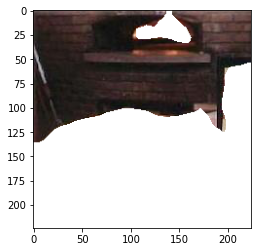

In [32]:
feature_img = ebano_local_exp_bottlecap.best_explanation.get_interpretable_feature(1)
plt.imshow(feature_img)
plt.show()
plt.close()

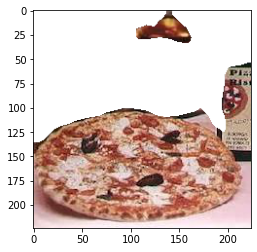

In [33]:
feature_img = ebano_local_exp_bottlecap.best_explanation.get_interpretable_feature(2)
plt.imshow(feature_img)
plt.show()
plt.close()

In [34]:
ebano_local_exp_bottlecap.best_explanation.get_numerical_explanation().loc[:, ["nPIR", "nPIRP"]].T

,1,2
nPIR,-0.234748,0.999982
nPIRP,0.620463,0.791658
